- GaussianNB implementa o algoritmo de Naive Bayes para classificação na sua versão Gaussiana, isto é, uma versão apropriada para tratar atributos que são dados reais.

- A probabilidade dos atributos é assumida como gaussiana: $P(x_i|y)= \frac{1}{\sqrt{2\pi\sigma_y^2}} {\rm exp}\Big(- \frac{(x_i-\mu_y)^2}{2\sigma_y^2}  \Big)$

- Os parâmetros $\sigma_y$ e $\mu_y$ são estimados utilizando uma abordagem de *maximum likelihood*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs( 100, 2, centers=2,  cluster_std=1.5, random_state=2 )
X[:4]

array([[ 0.92141506, -9.98499137],
       [-5.26927614, -9.6186543 ],
       [-0.45292089, -6.04316334],
       [-0.0856312 , -2.16867404]])

In [6]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [19]:
yg.shape

(40,)

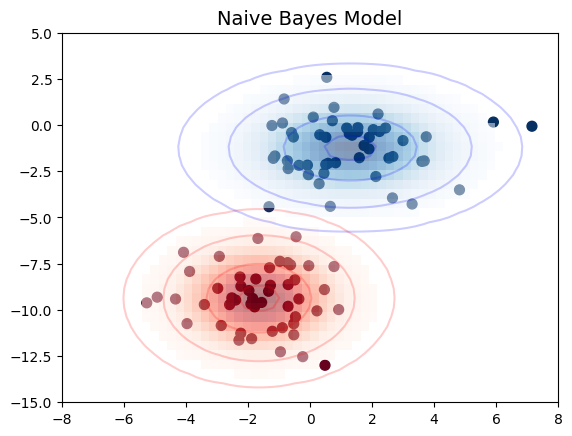

In [26]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Prob = []

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)

    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)

    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolormesh(xx, yy, Pm.reshape(xx.shape), alpha=0.5,
               cmap=color.title() + 's', shading='auto')
    Prob.append(P.reshape(xx.shape))
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)

GaussianNB()

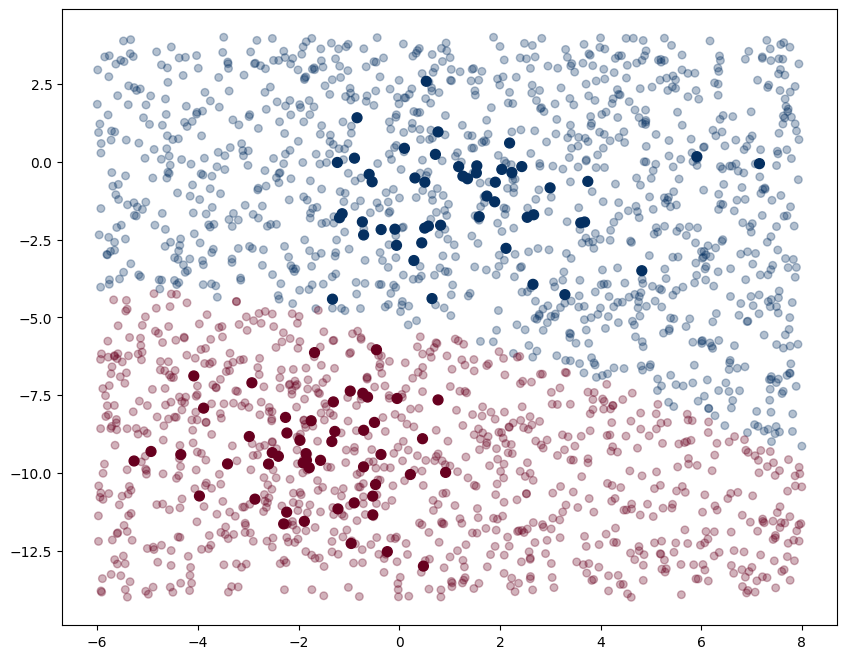

In [29]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=30, cmap='RdBu', alpha=0.3)
plt.show()


Vemos uma função de decisão ligeiramente curvada que separa as classes, isto mostra que em geral NB gaussiano é quadrático.

Uma boa parte desse formalismo bayesiano é que ele permite, naturalmente, gerar uma classificação probabilística, que podemos calcular usando o método predict_proba().

In [30]:
yprob = model.predict_proba(Xnew)
yprob

array([[9.25897220e-08, 9.99999907e-01],
       [8.05934584e-04, 9.99194065e-01],
       [5.95247683e-05, 9.99940475e-01],
       ...,
       [9.99994010e-01, 5.99039932e-06],
       [1.01364165e-09, 9.99999999e-01],
       [1.53083494e-01, 8.46916506e-01]])

As colunas fornecem as probabilidades posteriores do primeiro e do segundo rótulo, respectivamente.

### Exemplo usando o dataset Iris

O dataset Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em 1936. Ele contém 150 amostras de flores de íris, cada uma pertencendo a uma de três espécies diferentes. Para cada amostra, foram medidas quatro características (ou features).

O objetivo principal ao usar este dataset é construir um modelo de machine learning que possa prever a espécie de uma nova flor de íris com base nas medições de suas pétalas e sépalas. O dataset é essencialmente uma tabela com 150 linhas e 5 colunas.

* Linhas: Cada uma das 150 linhas representa uma flor individual que foi observada e medida.
* Colunas: Existem 5 colunas: 4 features e 1 alvo (a espécie).

As Features são as quatro medições (em centímetros) feitas em cada flor:

1. sepal length (comprimento da sépala): O comprimento da sépala.
2. sepal width (largura da sépala): A largura da sépala.
3. petal length (comprimento da pétala): O comprimento da pétala.
4. petal width (largura da pétala): A largura da pétala.

O Label é a variável que queremos prever. Ela representa a espécie da flor de íris. Existem três espécies no dataset:

1. Iris setosa
2. Iris versicolor
3. Iris virginica


Distribuição das Classes: É um dataset perfeitamente balanceado. Cada uma das 3 espécies tem exatamente 50 amostras. Isso é ótimo para treinar modelos, pois evita que o algoritmo fique enviesado para uma classe mais frequente.

Dados Limpos: Não há valores ausentes (missing values), o que o torna muito fácil de usar diretamente, sem necessidade de pré-processamento complexo.

Tipo de Dados: Todas as quatro features são numéricas e contínuas (números reais). O alvo é categórico.

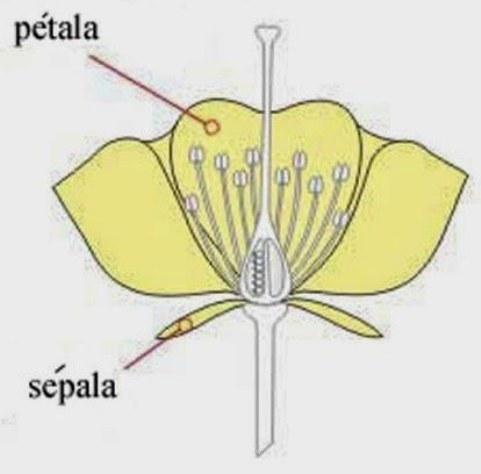

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



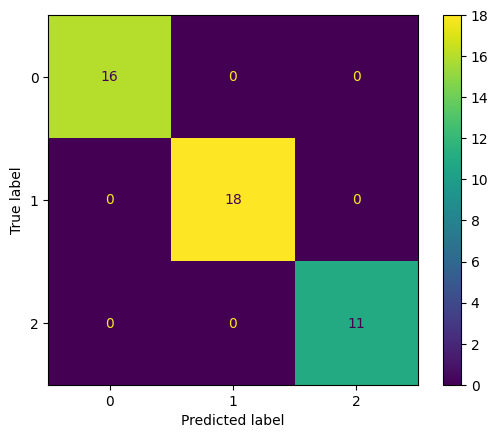

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

iris = load_iris()

X = iris.data
y = iris.target

print(iris.feature_names)
print(iris.target_names)
print(X.shape)

## deixar random_state=0
## depois trocar por random_state=5 e comparar os resultados
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GaussianNB()
clf.fit(Xtrain, ytrain)

y_pred = clf.predict(Xtest)

report = accuracy_score(ytest, y_pred)
print(classification_report(ytest, y_pred))
# Modified: Use ConfusionMatrixDisplay to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest)

In [47]:
Acc = []

for i in range(100):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
  clf = GaussianNB()
  clf.fit(Xtrain, ytrain)
  y_pred = clf.predict(Xtest)
  Acc.append(accuracy_score(ytest, y_pred))

print(np.mean(Acc), np.std(Acc))

0.9544444444444444 0.026550673656330043


Por que o classificador foi tão bom?

In [50]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = iris.target
df
df['Species'] = df['Species'].replace(to_replace= [0,1,2], value=iris.target_names )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


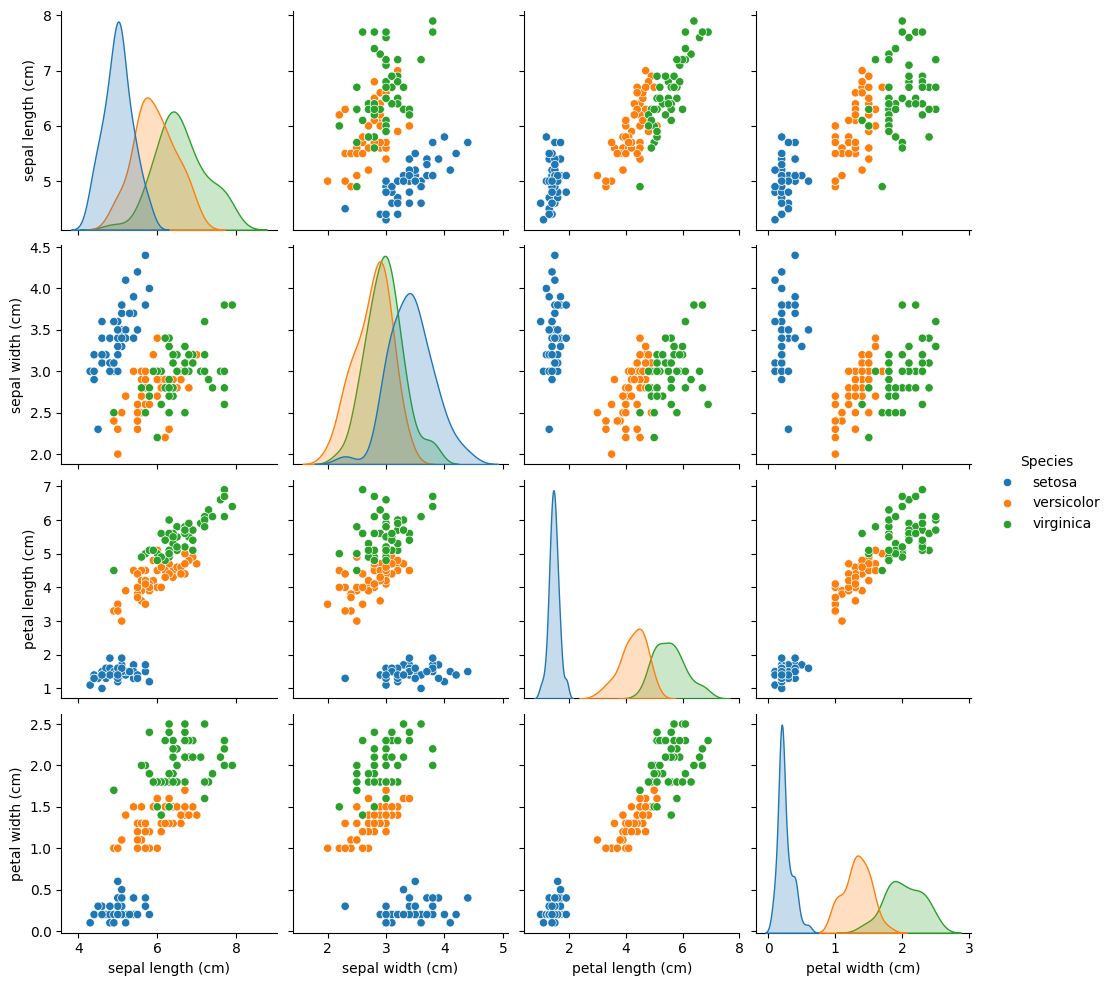

In [49]:
sns.pairplot(df, hue='Species')

## Selecionando as duas features mais discriminativas

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



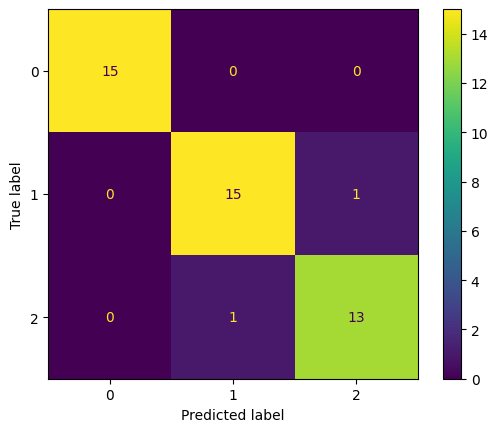

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay ## Import ConfusionMatrixDisplay

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=5) ## deixar random_state=0

# Xtrain = Xtrain[:,[0,2,3]]

clf = GaussianNB()
clf.fit(Xtrain[:,2:4], ytrain)

y_pred = clf.predict(Xtest[:,2:4])

report = accuracy_score(ytest, y_pred)
print(classification_report(ytest, y_pred))
# Modified: Use ConfusionMatrixDisplay to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, Xtest[:,2:4], ytest)

In [58]:
Acc = []

for i in range(30):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
  clf = GaussianNB()
  clf.fit(Xtrain[:,2:4], ytrain)
  y_pred = clf.predict(Xtest[:,2:4])
  Acc.append(accuracy_score(ytest, y_pred))

print(np.mean(Acc), np.std(Acc))

0.9614814814814816 0.029219382108616323
